# NHL Season Data to Predict Rankings
### Jacob Mayer, Kyle Lindsey, Kyle Davison

### Part 1. Statement of the Problem

**In our project, we are looking to see if we can use the sklearn nearest neighbor algorithm to accurately predict where an NHL team would place at the end of the season, using different types of parameters from Hockeyreference.com. It is interesting because we will be able to find out which statistics in hockey will correlate to a better season, which could be good to know if you were to bet on teams or something along those lines.**

### Part 2:

**The data that we used all comes from Hockeyreference.com. We created an excel spreadsheet of all the end of season data for the NHL from 2006-2007 to 2016-2017. In our program, we used pandas to parse through the dataframes to get the different stats we were looking for. The data is below.**

In [205]:
import pandas as pd


#file_17_18 = pd.read_excel('NHL_stats.xlsx',sheet_name =0, skiprows= 1)
file_16_17 = pd.read_excel('NHL_stats.xlsx',sheet_name =1, skiprows= 1)
file_15_16 = pd.read_excel('NHL_stats.xlsx',sheet_name =2, skiprows= 1)
file_14_15 = pd.read_excel('NHL_stats.xlsx',sheet_name =3, skiprows= 1)
file_13_14 = pd.read_excel('NHL_stats.xlsx',sheet_name =4, skiprows= 1)
file_12_13 = pd.read_excel('NHL_stats.xlsx',sheet_name =5, skiprows= 1)
file_11_12 = pd.read_excel('NHL_stats.xlsx',sheet_name =6, skiprows= 1)
file_10_11 = pd.read_excel('NHL_stats.xlsx',sheet_name =7, skiprows= 1)
file_09_10 = pd.read_excel('NHL_stats.xlsx',sheet_name =8, skiprows= 1)
file_08_09 = pd.read_excel('NHL_stats.xlsx',sheet_name =9, skiprows= 1)
file_07_08 = pd.read_excel('NHL_stats.xlsx',sheet_name =10, skiprows= 1)
file_06_07 = pd.read_excel('NHL_stats.xlsx',sheet_name =11, skiprows= 1)
#usecols= [0,1,2,7,8,9,10,13,14,15,16,17]
stats_lst = [file_06_07,file_07_08,file_08_09,file_09_10,file_10_11,file_11_12,file_12_13,file_13_14,file_14_15,file_15_16,file_16_17]
file_07_08

,Rk,2007-2008,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Detroit Red Wings*,32.1,82,54,21,7,115,0.701,252,...,84.03,5,7,11.4,12.7,2820,8.9,1930,0.907,9
1,2.0,San Jose Sharks*,27.7,82,49,23,10,108,0.659,216,...,85.81,7,9,13.1,15.7,2428,8.9,1981,0.906,7
2,3.0,Montreal Canadiens*,27.6,82,47,25,10,104,0.634,257,...,82.46,8,3,13.3,14.1,2382,10.8,2589,0.917,6
3,4.0,Anaheim Ducks*,29.7,82,47,27,8,102,0.622,197,...,83.09,8,7,18.1,16.9,2241,8.8,2299,0.920,4
4,5.0,Pittsburgh Penguins*,26.9,82,47,27,8,102,0.622,240,...,80.95,6,10,14.4,15.1,2268,10.6,2523,0.916,8
5,6.0,New Jersey Devils*,29.2,82,46,29,7,99,0.604,198,...,82.80,6,7,11.9,12.0,2362,8.4,2257,0.914,4
6,7.0,Minnesota Wild*,27.7,82,44,28,10,98,0.598,220,...,85.15,3,10,13.4,14.1,2218,9.9,2469,0.915,5
7,8.0,New York Rangers*,27.4,82,42,27,13,97,0.591,205,...,84.55,4,6,14.1,14.3,2579,7.9,2124,0.911,12
8,9.0,Dallas Stars*,29.0,82,45,30,7,97,0.591,237,...,85.59,13,8,14.3,14.6,2187,10.8,2137,0.905,5
9,10.0,Colorado Avalanche*,28.5,82,44,31,7,95,0.579,224,...,81.40,2,5,12.1,12.9,2349,9.5,2237,0.903,3


In [206]:
for dataframe in stats_lst:
    # Stripping the sterisk out of the names
    for iterator , string in enumerate(dataframe.iloc[:,1]):
        dataframe.iloc[iterator,1] = string.strip('*')
    #print(dataframe.iloc[:,1])
        

### Part 3:

**Since we are looking at rankings, which is a form of classification, we used the sklearn nearest neighbor model. It learns from the training data what each feature vector should be labeled as, then when we put in the testing vectors, it looks to see which classification the vector is closest to. A strength of this model is that it is only as good as the parameters we pick to use. There are some statistics that correlate better to a winning team than others, and for statistics that do not correlate well, this model will fail to be effective. On the other hand, If the statistics chosen do correlate to a winning team, then this model will be effective due to certain team rankings having similar stats.**

In [207]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set up class labels and feature vectors
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, rank in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(rank)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 2:6]])
        
#class_labels
#feature_vector




In [208]:
# Set up the training and test vectors
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
#test_labels

In [209]:
from sklearn.neighbors import KNeighborsClassifier

#Using nearest neighbor to guess placing
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
#for i in range(len(results)):
#    print(test_labels[i], "    ", results[i])

In [210]:
neigh.score(test_vectors,test_labels)

0.18181818181818182

In [211]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, average in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(average)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 3:7]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.22727272727272727

In [212]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, games in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(games)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 4:8]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.13636363636363635

In [234]:
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, games in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(games)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 5:9]])
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .30, train_size = .7)
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
neigh.score(test_vectors,test_labels)

0.1717171717171717

In [235]:
def score_with_error(true_vect, guess_vect):
    # Adds +- 1 to the predicted score for a more realistic prediction
    count = 0
    for i in range(len(true_vect)):
        if (guess_vect[i] >= true_vect[i] - 1) and  (guess_vect[i] <= true_vect[i] + 1):
            count += 1
    return count /len(true_vect)

In [242]:
feat_vect = []
score = []
placement_scores = {
    'Top5':[],
    'Middle5':[],
    'Bottom5':[],
    'Stats':[]
}
for j in range(len(file_07_08)):
    if 6 +j > 30:
        break
    #print(file_07_08.columns[j],j)
    top5=[]
    middle5 = []
    bottom5 = []
    statnames = []
    class_labels = []
    feature_vectors = []
    for dataframe in stats_lst:
        for iteration, average in enumerate(dataframe.iloc[:-1,0]):
            class_labels.append(average)
            feature_vectors.append([i for i in dataframe.iloc[iteration, 2+j:6+j]])
    for name in range(2+j,6+j):
        statnames.append(dataframe.columns[name])
    train_vectors, test_vectors, train_labels, test_labels = train_test_split(
        feature_vectors, class_labels, test_size = .30, train_size = .7)
    neigh = KNeighborsClassifier(n_neighbors=8)
    neigh.fit(train_vectors,train_labels)
    results = neigh.predict(test_vectors)
    
    for val in range(len(test_labels)): # collecting placement data
        if test_labels[val] <=5:
            top5.append([test_labels[val], results[val]])
        elif (12 < test_labels[val] < 18):
            middle5.append([test_labels[val], results[val]])
        elif (test_labels[val] >= 25):
            bottom5.append([test_labels[val], results[val]])
            
    placement_scores['Top5'].append(top5)
    placement_scores['Middle5'].append(middle5)
    placement_scores['Bottom5'].append(bottom5)
    placement_scores['Stats'].append(statnames)
    
    score.append(score_with_error(test_labels,results))
    feat_vect.append(feature_vectors)
#print(feat_vect[0]) #0-30 different vector arrays
print(np.round(score,5))
#placement_scores['Stats']

[0.51515 0.48485 0.55556 0.57576 0.30303 0.32323 0.29293 0.23232 0.23232
 0.10101 0.25253 0.06061 0.19192 0.18182 0.11111 0.13131 0.16162 0.06061
 0.09091 0.06061 0.0404  0.06061 0.06061 0.12121 0.14141]


In [243]:
for i in range(len(score)):
    print("{} got a score of {:.5f}".format(placement_scores['Stats'][i],score[i]))

['AvAge', 'GP', 'W', 'L'] got a score of 0.51515
['GP', 'W', 'L', 'OL'] got a score of 0.48485
['W', 'L', 'OL', 'PTS'] got a score of 0.55556
['L', 'OL', 'PTS', 'PTS%'] got a score of 0.57576
['OL', 'PTS', 'PTS%', 'GF'] got a score of 0.30303
['PTS', 'PTS%', 'GF', 'GA'] got a score of 0.32323
['PTS%', 'GF', 'GA', 'SOW'] got a score of 0.29293
['GF', 'GA', 'SOW', 'SOL'] got a score of 0.23232
['GA', 'SOW', 'SOL', 'SRS'] got a score of 0.23232
['SOW', 'SOL', 'SRS', 'SOS'] got a score of 0.10101
['SOL', 'SRS', 'SOS', 'TG/G'] got a score of 0.25253
['SRS', 'SOS', 'TG/G', 'EVGF'] got a score of 0.06061
['SOS', 'TG/G', 'EVGF', 'EVGA'] got a score of 0.19192
['TG/G', 'EVGF', 'EVGA', 'PP'] got a score of 0.18182
['EVGF', 'EVGA', 'PP', 'PPO'] got a score of 0.11111
['EVGA', 'PP', 'PPO', 'PP%'] got a score of 0.13131
['PP', 'PPO', 'PP%', 'PPA'] got a score of 0.16162
['PPO', 'PP%', 'PPA', 'PPOA'] got a score of 0.06061
['PP%', 'PPA', 'PPOA', 'PK%'] got a score of 0.09091
['PPA', 'PPOA', 'PK%', '

# Plotting Results for Best Parameters

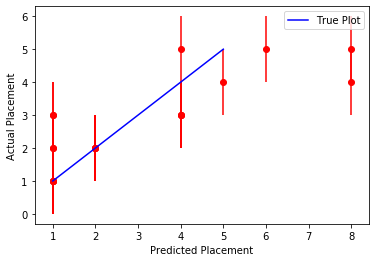

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(placement_scores['Top5'])):
    for j in placement_scores['Top5'][i]:
        if i == 3:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([i],[1,2,3,4,5], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()

Text(0.5, 1.0, 'Middle 5 Rankings')

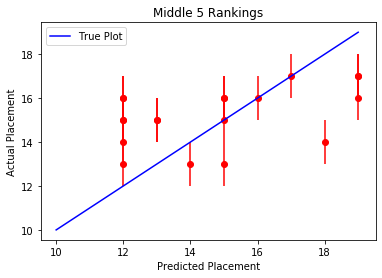

In [248]:
for i in range(len(placement_scores['Middle5'])):
    for j in placement_scores['Middle5'][i]:
        if i == 3:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([i for i in range(10,20)],[i for i in range(10,20)], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()
plt.title("Middle 5 Rankings")

Text(0.5, 1.0, 'Bottom 5 Rankings')

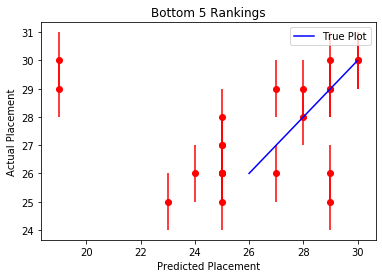

In [246]:
for i in range(len(placement_scores['Bottom5'])):
    for j in placement_scores['Bottom5'][i]:
        if i == 3:
            plt.scatter(j[1],j[0], color = 'red', alpha = 1)
            plt.errorbar(j[1],j[0],1, color = "red")
plt.plot([26,27,28,29,30],[26,27,28,29,30], color = 'blue', label = "True Plot")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.xlabel("Predicted Placement")
plt.ylabel("Actual Placement")
plt.legend()
plt.title("Bottom 5 Rankings")